<a href="https://colab.research.google.com/github/John-G-Thomas/Prodjects/blob/master/Project_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0) Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import matplotlib.style as style
import warnings
import datetime as datetime
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



- Begin to analyze and visualize your data. Try and have all data cleaning and reshaping wrapped up by the end of the first day so as to allow you ample time to create super awesome visualizations.

### 1) Extras

### 2) With this dataset I will be showing the Uncentainty and land Average global temperature increasing from 1750 - present(Monthly)

In [11]:
GlobalTemps = pd.read_csv('GlobalTemperatures.csv')
print(GlobalTemps.shape)
GlobalTemps.head()

(3192, 9)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
GlobalTemps.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [13]:
GlobalTemps['dt'] = pd.to_datetime(GlobalTemps['dt'], infer_datetime_format=True)
GlobalTemps['date'] = GlobalTemps['dt'].dt.strftime('%Y')

In [14]:
GlobalTemps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,date
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [15]:
df = GlobalTemps.drop(columns=['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty','LandAndOceanAverageTemperature'])
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,date
0,1750-01-01,3.034,3.574,1750
1,1750-02-01,3.083,3.702,1750
2,1750-03-01,5.626,3.076,1750
3,1750-04-01,8.490,2.451,1750
4,1750-05-01,11.573,2.072,1750


In [16]:
df['UpperBounds'] = (df['LandAverageTemperature'] + df['LandAverageTemperatureUncertainty'])
df['LowerBounds'] = (df['LandAverageTemperature'] - df['LandAverageTemperatureUncertainty'])

In [17]:
df['Average_Temperature'] = df['LandAverageTemperature']

In [18]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,date,UpperBounds,LowerBounds,Average_Temperature
0,1750-01-01,3.034,3.574,1750,6.608,-0.540,3.034
1,1750-02-01,3.083,3.702,1750,6.785,-0.619,3.083
2,1750-03-01,5.626,3.076,1750,8.702,2.550,5.626
3,1750-04-01,8.490,2.451,1750,10.941,6.039,8.490
4,1750-05-01,11.573,2.072,1750,13.645,9.501,11.573


In [19]:
df['date'][0]

'1750'

In [20]:
dates = '1750'

In [21]:
def date(cell_contents):
  return int(cell_contents)

In [22]:
type(date(dates))

int

In [23]:
cleaned = []

for dates in df['date']:
  cleaned.append(date(dates))

df['date'] = pd.Series(cleaned)

In [24]:
# Graph average temperatures from counties

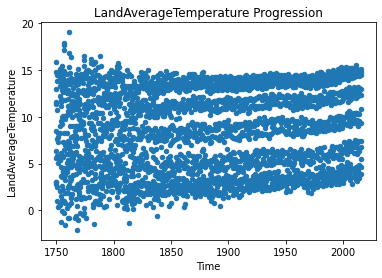

In [25]:
df.plot.scatter('date', "LandAverageTemperature")
plt.title('LandAverageTemperature Progression')
plt.xlabel('Time')
plt.ylabel('LandAverageTemperature');

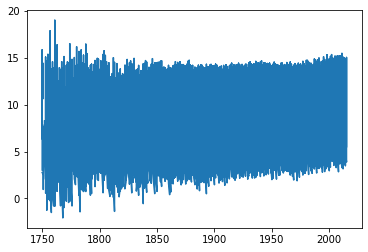

In [26]:
plt.plot(df.date, df.LandAverageTemperature)
plt.show()

In [27]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,date,UpperBounds,LowerBounds,Average_Temperature
0,1750-01-01,3.034,3.574,1750,6.608,-0.540,3.034
1,1750-02-01,3.083,3.702,1750,6.785,-0.619,3.083
2,1750-03-01,5.626,3.076,1750,8.702,2.550,5.626
3,1750-04-01,8.490,2.451,1750,10.941,6.039,8.490
4,1750-05-01,11.573,2.072,1750,13.645,9.501,11.573


In [28]:
# Final Cleaning

In [29]:
h = df.groupby(["date"])
yearly_average = h.aggregate({"Average_Temperature":np.mean})

In [30]:
yearly_average['Upper_Uncertainty'] = h.aggregate({"UpperBounds":np.mean})

In [31]:
yearly_average['Lower_Uncertainty'] = h.aggregate({"LowerBounds":np.mean})
yearly_average

,Average_Temperature,Upper_Uncertainty,Lower_Uncertainty
date,,,
1750,8.719364,11.357182,6.081545
1751,7.976143,10.757286,5.195000
1752,5.779833,8.756833,2.802833
1753,8.388083,11.564083,5.212083
1754,8.469333,11.963583,4.975083
...,...,...,...
2011,9.516000,9.598000,9.434000
2012,9.507333,9.590750,9.423917
2013,9.606500,9.704167,9.508833


In [32]:
mylist = df.date
mylist = list(dict.fromkeys(mylist))

In [33]:
yearly_average['Year']= mylist

### 3) Dataset on Carbon Emmisions by Country - (1751 - present)

In [34]:
Country_Greenhouse_gas = pd.read_csv('https://pkgstore.datahub.io/core/co2-fossil-by-nation/fossil-fuel-co2-emissions-by-nation_csv/data/0f04181960a0a896ebaf6d8afb0b71a6/fossil-fuel-co2-emissions-by-nation_csv.csv')
print(Country_Greenhouse_gas.shape)
Country_Greenhouse_gas.head()

(17232, 10)


,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [ ]:
Country_Greenhouse_gas['Country'].unique()

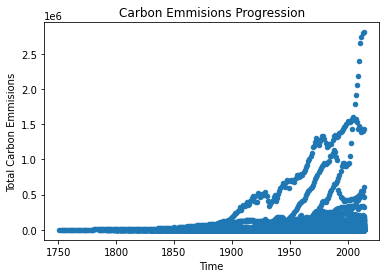

In [36]:
Country_Greenhouse_gas.plot.scatter('Year', "Total")
plt.title('Carbon Emmisions Progression')
plt.xlabel('Time')
plt.ylabel('Total Carbon Emmisions');

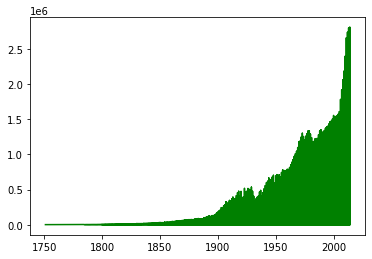

In [37]:
plt.plot(Country_Greenhouse_gas.Year, Country_Greenhouse_gas.Total, color='g')
plt.show()

In [38]:
Carbon_Emmisions = Country_Greenhouse_gas.pivot_table(index='Year', columns='Country', values='Total')

In [39]:
Carbon_Emmisions = Carbon_Emmisions[['UNITED STATES OF AMERICA', 'JAPAN', 'QATAR', 'INDIA', 'RUSSIAN FEDERATION', 'CHINA (MAINLAND)', 'BRAZIL', 'AUSTRALIA', 'GERMANY']]
Carbon_Emmisions

Country,UNITED STATES OF AMERICA,JAPAN,QATAR,INDIA,RUSSIAN FEDERATION,CHINA (MAINLAND),BRAZIL,AUSTRALIA,GERMANY
Year,,,,,,,,,
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2010,1471375.0,319505.0,19773.0,468964.0,455558.0,2393248.0,114468.0,106589.0,206943.0
2011,1442509.0,324809.0,21935.0,502257.0,480885.0,2654360.0,119829.0,106850.0,199754.0
2012,1396083.0,335470.0,25668.0,550451.0,499272.0,2734817.0,128178.0,105843.0,201762.0


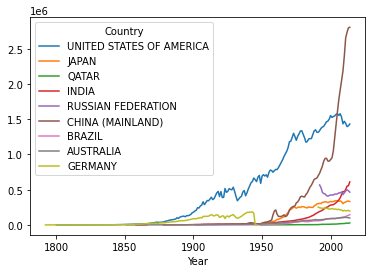

In [40]:
Carbon_Emmisions.plot();

In [41]:
mylist = Country_Greenhouse_gas.Year
mylist = list(dict.fromkeys(mylist))

In [42]:
Carbon_Emmisions['Year']= mylist

In [ ]:
#Bar Graph visalization by per capita data cleaning

In [66]:
select_year = Country_Greenhouse_gas.loc[Country_Greenhouse_gas['Year'] == 2014]
select_year = select_year.loc[select_year['Per Capita'] >= 2.05]

In [79]:
select_year =select_year.sort_values('Per Capita')

In [80]:
select_year

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
17051,2014,CHINA (MAINLAND),2806634,2026492,344725,96504,338912,0,2.05,12066
17151,2014,NEW ZEALAND,9453,1505,5014,2744,150,39,2.10,918
17131,2014,MALAYSIA,66218,15793,24442,21399,2992,1591,2.21,2271
17108,2014,ISRAEL,17617,6775,6013,3930,898,0,2.22,1011
17030,2014,BELGIUM,25457,3215,13543,7869,830,0,2.27,5889
17107,2014,ISLAMIC REPUBLIC OF IRAN,177115,900,66662,91127,8976,9450,2.27,4218
17021,2014,ARUBA,238,0,238,0,0,0,2.30,80
17080,2014,FINLAND,12899,4677,6482,1570,170,0,2.35,602
17087,2014,GERMANY,196314,84098,68263,39582,4365,5,2.43,8706
17091,2014,GREENLAND,138,0,138,0,0,0,2.46,15


### 4) Polished explanatory visualizations On Carbon Emmisions

- Carbon Emmisions from top countries by regions UNITED STATES OF AMERICA, JAPAN, NIGER, INDIA, SAUDI ARABIA, RUSSIAN FEDERATION, CHINA (MAINLAND), BRAZIL, AUSTRALIA, GERMANY, MEXICO

In [43]:
# Polished Dataframe for Carbon Emmisions

In [44]:
Carbon_Emmisions = Carbon_Emmisions.rename(columns={'UNITED STATES OF AMERICA': 'UNITED STATES'})
Carbon_Emmisions =Carbon_Emmisions.rename(columns={'CHINA (MAINLAND)': 'CHINA'})
Carbon_Emmisions =Carbon_Emmisions.rename(columns={'RUSSIAN FEDERATION': 'RUSSIA'})
Carbon_Emmisions.head()

Country,UNITED STATES,JAPAN,QATAR,INDIA,RUSSIA,CHINA,BRAZIL,AUSTRALIA,GERMANY,Year
Year,,,,,,,,,,
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751
1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1752
1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1753
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1754
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1755


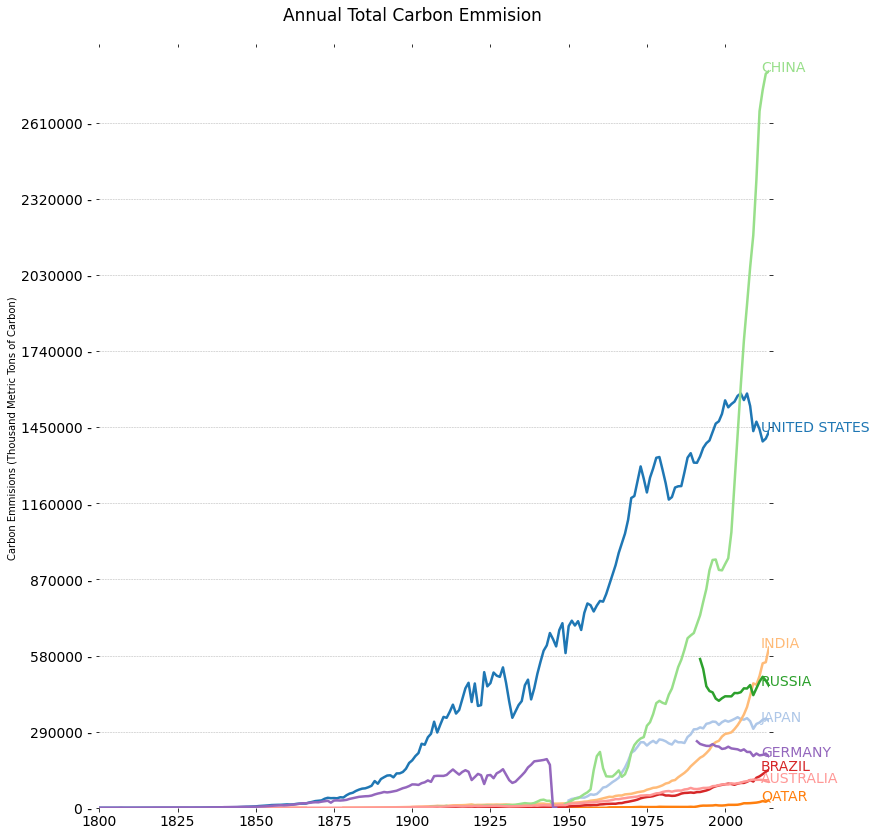

In [59]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
  
plt.figure(figsize=(12, 14))    
     
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.ylim(0, 2900000)    
plt.xlim(1800, 2014)    
   
plt.yticks(range(0, 2900000, 290000), [str(x) + " -" for x in range(0, 2900000, 290000)], fontsize=14)    
plt.xticks(fontsize=14)    
   
for y in range(290000, 2900000, 290000):    
    plt.plot(range(1800, 2014), [y] * len(range(1800, 2014)), "--", lw=0.5, color="black", alpha=0.3)    
     
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
majors = ['UNITED STATES', 'JAPAN', 'QATAR', 'INDIA', 'RUSSIA', 'CHINA', 'BRAZIL', 'AUSTRALIA', 'GERMANY']    
  
for rank, column in enumerate(majors):    

    plt.plot(Carbon_Emmisions.Year.values,    
            Carbon_Emmisions[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])        
    y_pos = Carbon_Emmisions[column.replace("\n", " ")].values[-1] - 0.5    

    if column == "UNITED STATES":    
        y_pos += 0.5    
    elif column == "JAPAN":    
        y_pos -= 0.5    
    elif column == "QATAR":    
        y_pos += 0.75    
    elif column == "INDIA":    
        y_pos -= 0.25      
    elif column == "RUSSIA":    
        y_pos += 0.25    
    elif column == "CHINA":    
        y_pos -= 0.75    
    elif column == "BRAZIL":    
        y_pos += 0.75    
    elif column == "AUSTRALIA":    
        y_pos -= .55    
    elif column == "GERMANY":    
        y_pos += 0.75      
# x and title labels
    plt.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])
plt.ylabel('Carbon Emmisions (Thousand Metric Tons of Carbon)')
plt.text(1900, 3000000, "Annual Total Carbon Emmision", fontsize=17, ha="center")     
plt.savefig("Carbon_Footprint.png", bbox_inches="tight") 

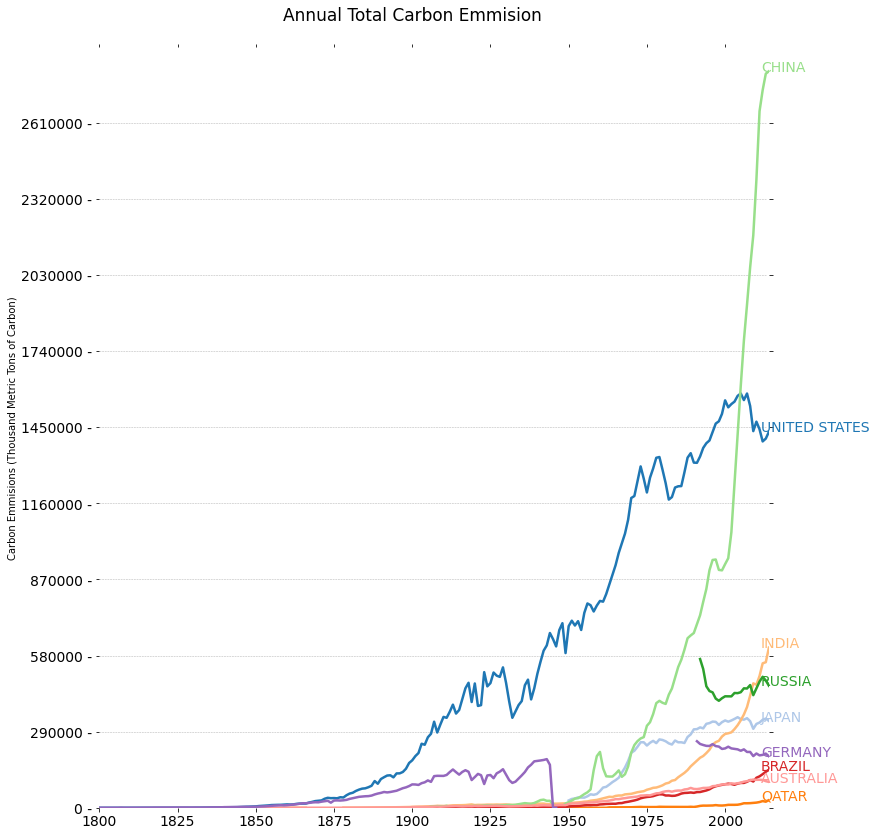

In [60]:
from IPython.display import display, Image
png = 'Carbon_Footprint.png'
example = Image(png, width=1030)
display(example)

###5) Global Temperaturs Visualization

In [47]:
# Polished Dataframe for Carbon Emmisions for Global Temperatures

In [48]:
print(yearly_average.shape)
yearly_average.head()

(266, 4)


,Average_Temperature,Upper_Uncertainty,Lower_Uncertainty,Year
date,,,,
1750,8.719364,11.357182,6.081545,1750
1751,7.976143,10.757286,5.195000,1751
1752,5.779833,8.756833,2.802833,1752
1753,8.388083,11.564083,5.212083,1753
1754,8.469333,11.963583,4.975083,1754


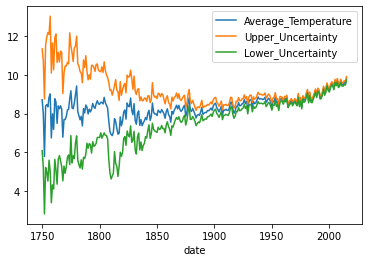

In [50]:
yearly_average[['Average_Temperature','Upper_Uncertainty','Lower_Uncertainty']].plot()
plt.show()

In [51]:
yearly_average.describe()

,Average_Temperature,Upper_Uncertainty,Lower_Uncertainty,Year
count,266.000000,266.000000,266.000000,266.000000
mean,8.369337,9.315056,7.423619,1882.500000
std,0.584921,0.912942,1.351780,76.931788
min,5.779833,8.169917,2.802833,1750.000000
25%,8.081562,8.703146,6.531563,1816.250000
50%,8.372167,8.956667,7.705958,1882.500000
75%,8.704167,9.693333,8.457771,1948.750000
max,9.831000,13.048000,9.738833,2015.000000


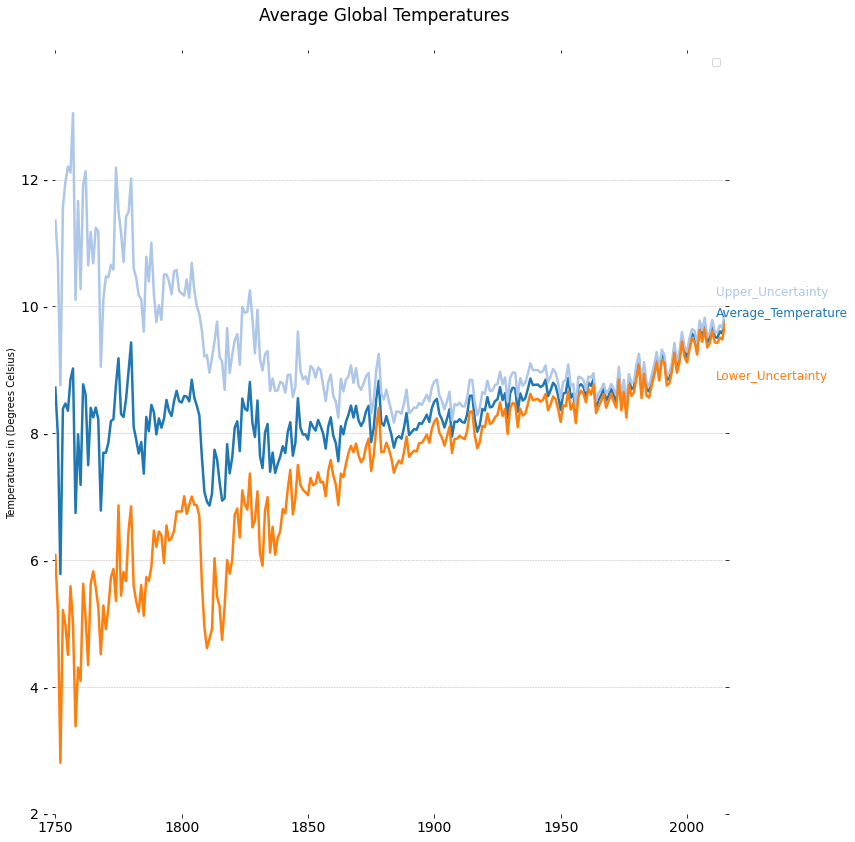

In [57]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
  
plt.figure(figsize=(12, 14))    
     
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
ax.legend('LandAverageTemperature')
plt.ylim(2, 14)    
plt.xlim(1750, 2015)    
   
plt.yticks(range(2, 14, 2), [str(x) + " -" for x in range(2, 14, 2)], fontsize=14)    
plt.xticks(fontsize=14)    
   
for y in range(2, 14, 2):    
    plt.plot(range(1750, 2015), [y] * len(range(1750, 2015)), "--", lw=0.5, color="black", alpha=0.3)    
     
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")     
majors = ['Average_Temperature', 'Upper_Uncertainty', 'Lower_Uncertainty']    

for rank, column in enumerate(majors):

    plt.plot(yearly_average.Year.values,    
            yearly_average[column.replace("\n", " ")].values,    
            lw=2.5, color=tableau20[rank])        
    y_pos = yearly_average[column.replace("\n", " ")].values[-1] - 0.5    

    if column == "Average_Temperature":    
        y_pos += 0.5    
    elif column == "Lower_Uncertainty":    
        y_pos -= 0.4   
    elif column == "Upper_Uncertainty":    
        y_pos += 0.75     
# x and title labels
    plt.text(2011.5, y_pos, column, fontsize=12, color=tableau20[rank]) 
plt.ylabel('Temperatures in (Degrees Celsius)')
plt.text(1880, 14.5, "Average Global Temperatures", fontsize=17, ha="center");
plt.savefig("Global_warming.png", bbox_inches="tight") 

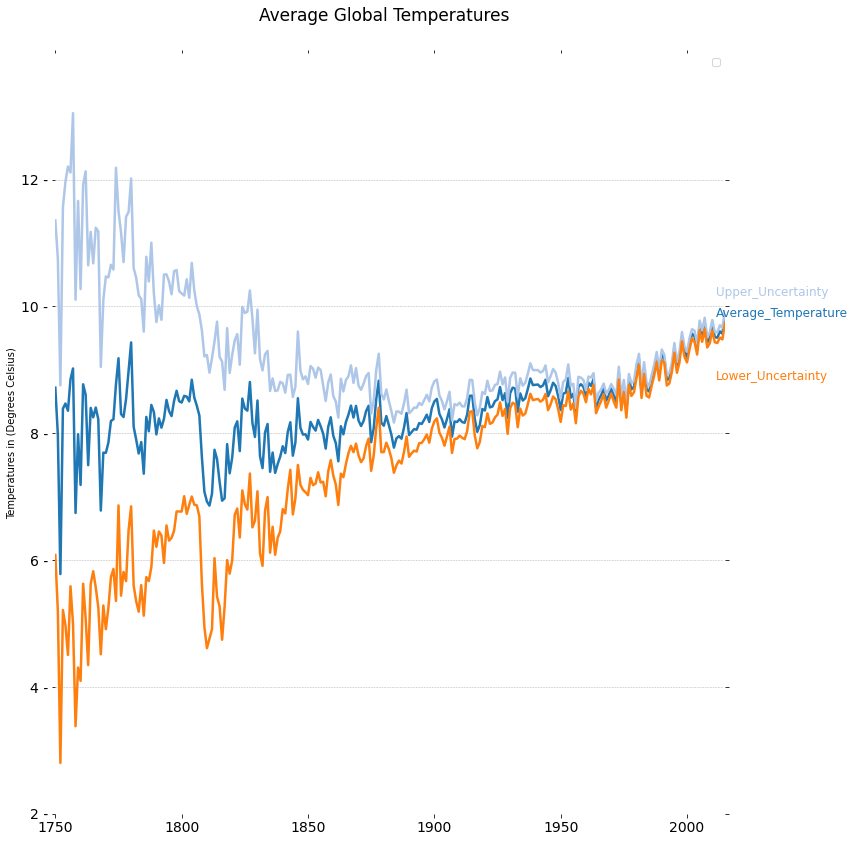

In [58]:
from IPython.display import display, Image
png = 'Global_warming.png'
example = Image(png, width=800)
display(example)

###6) Diving deeper into which country can imporve

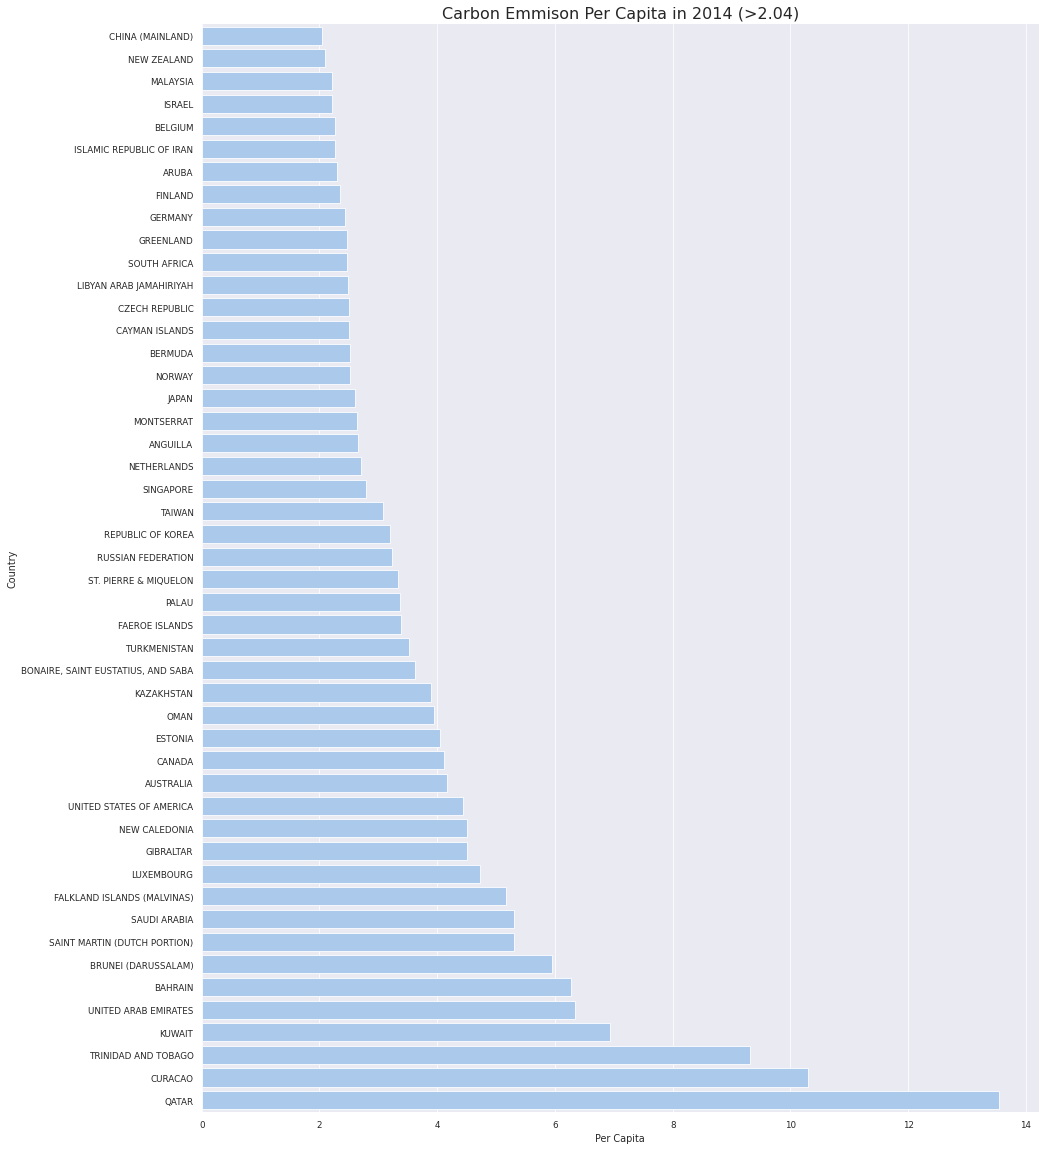

In [99]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,20))
sns.set_color_codes('pastel')
sns.barplot(x = 'Per Capita', y = 'Country', data = select_year,
            label = 'Carbon Emmisions Per Capita', color = 'b', edgecolor = 'w')
sns.despine(left = True, bottom = True)
plt.title('Carbon Emmison Per Capita in 2014 (>2.04)',fontsize=16)
plt.savefig("Per_Capita_2014.png", bbox_inches="tight") 
plt.show()

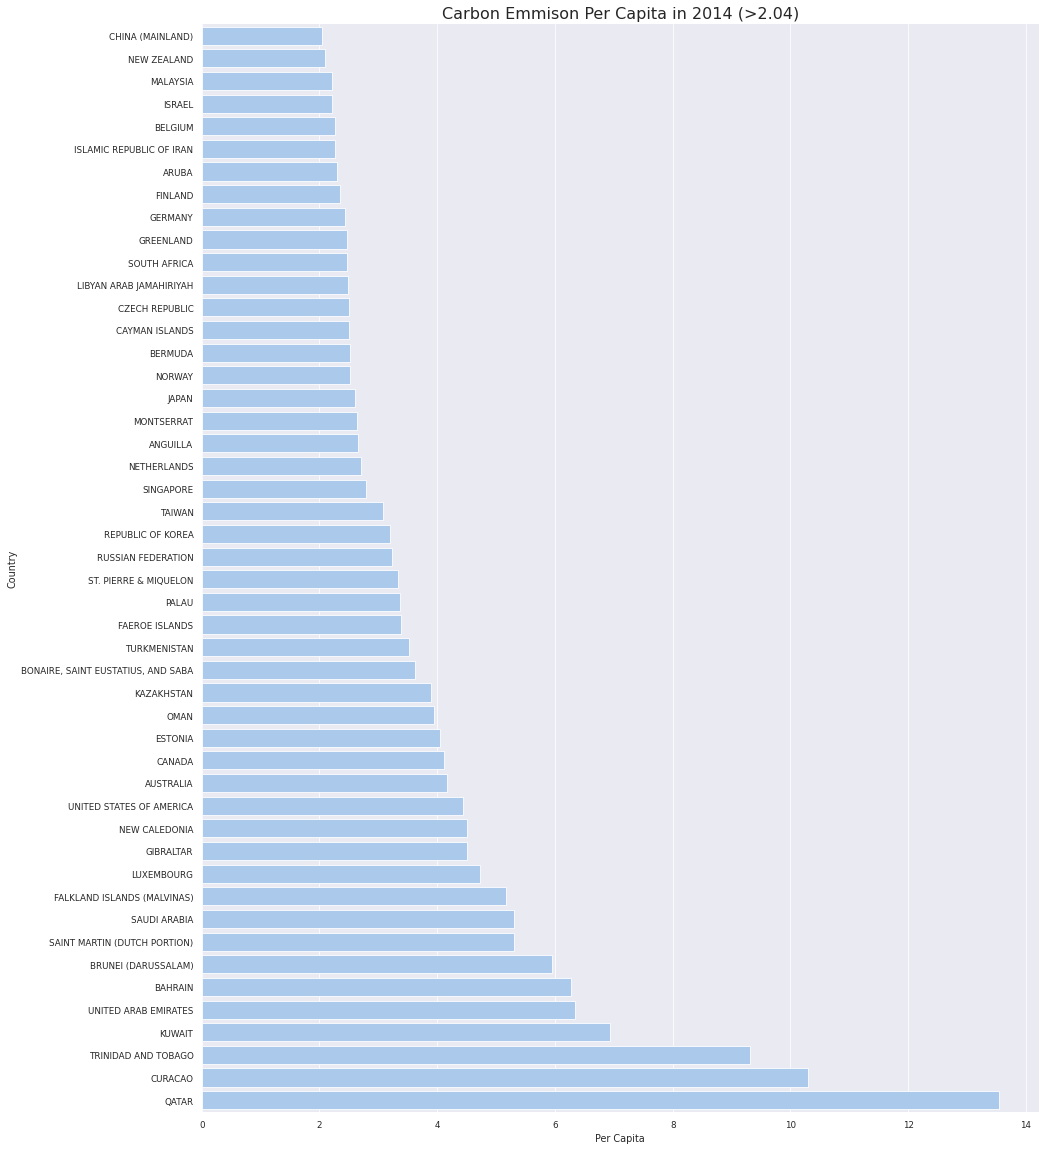

In [100]:
png = 'Per_Capita_2014.png'
example = Image(png, width=900)
display(example)

### 7) Polar Ice caps melting can't find dataset